### Import Packages

In [20]:
import numpy
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant



### Load Dataset

In [21]:
data_path ="Cleaned_Bike_dataset.csv"
df = pd.read_csv(data_path,encoding="unicode_escape")

In [22]:
df.head()

Rented Bike Count  Hour  Temperature(Â°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0              -5.2           37               2.2   
1                204     1              -5.5           38               0.8   
2                173     2              -6.0           39               1.0   
3                107     3              -6.2           40               0.9   
4                 78     4              -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(Â°C)  Solar Radiation (MJ/m2)  \
0              2000                       -17.6                      0.0   
1              2000                       -17.6                      0.0   
2              2000                       -17.7                      0.0   
3              2000                       -17.6                      0.0   
4              2000                       -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day   Day  \
0           0.0            0.0  Winter  No Holiday             Yes  12.0   
1           0.0            0.0  Winter  No Holiday             Yes  12.0   
2           0.0            0.0  Winter  No Holiday             Yes  12.0   
3           0.0            0.0  Winter  No Holiday             Yes  12.0   
4           0.0            0.0  Winter  No Holiday             Yes  12.0   

   Month    Year   weekday  
0    1.0  2017.0  Thursday  
1    1.0  2017.0  Thursday  
2    1.0  2017.0  Thursday  
3    1.0  2017.0  Thursday  
4    1.0  2017.0  Thursday

## EDA

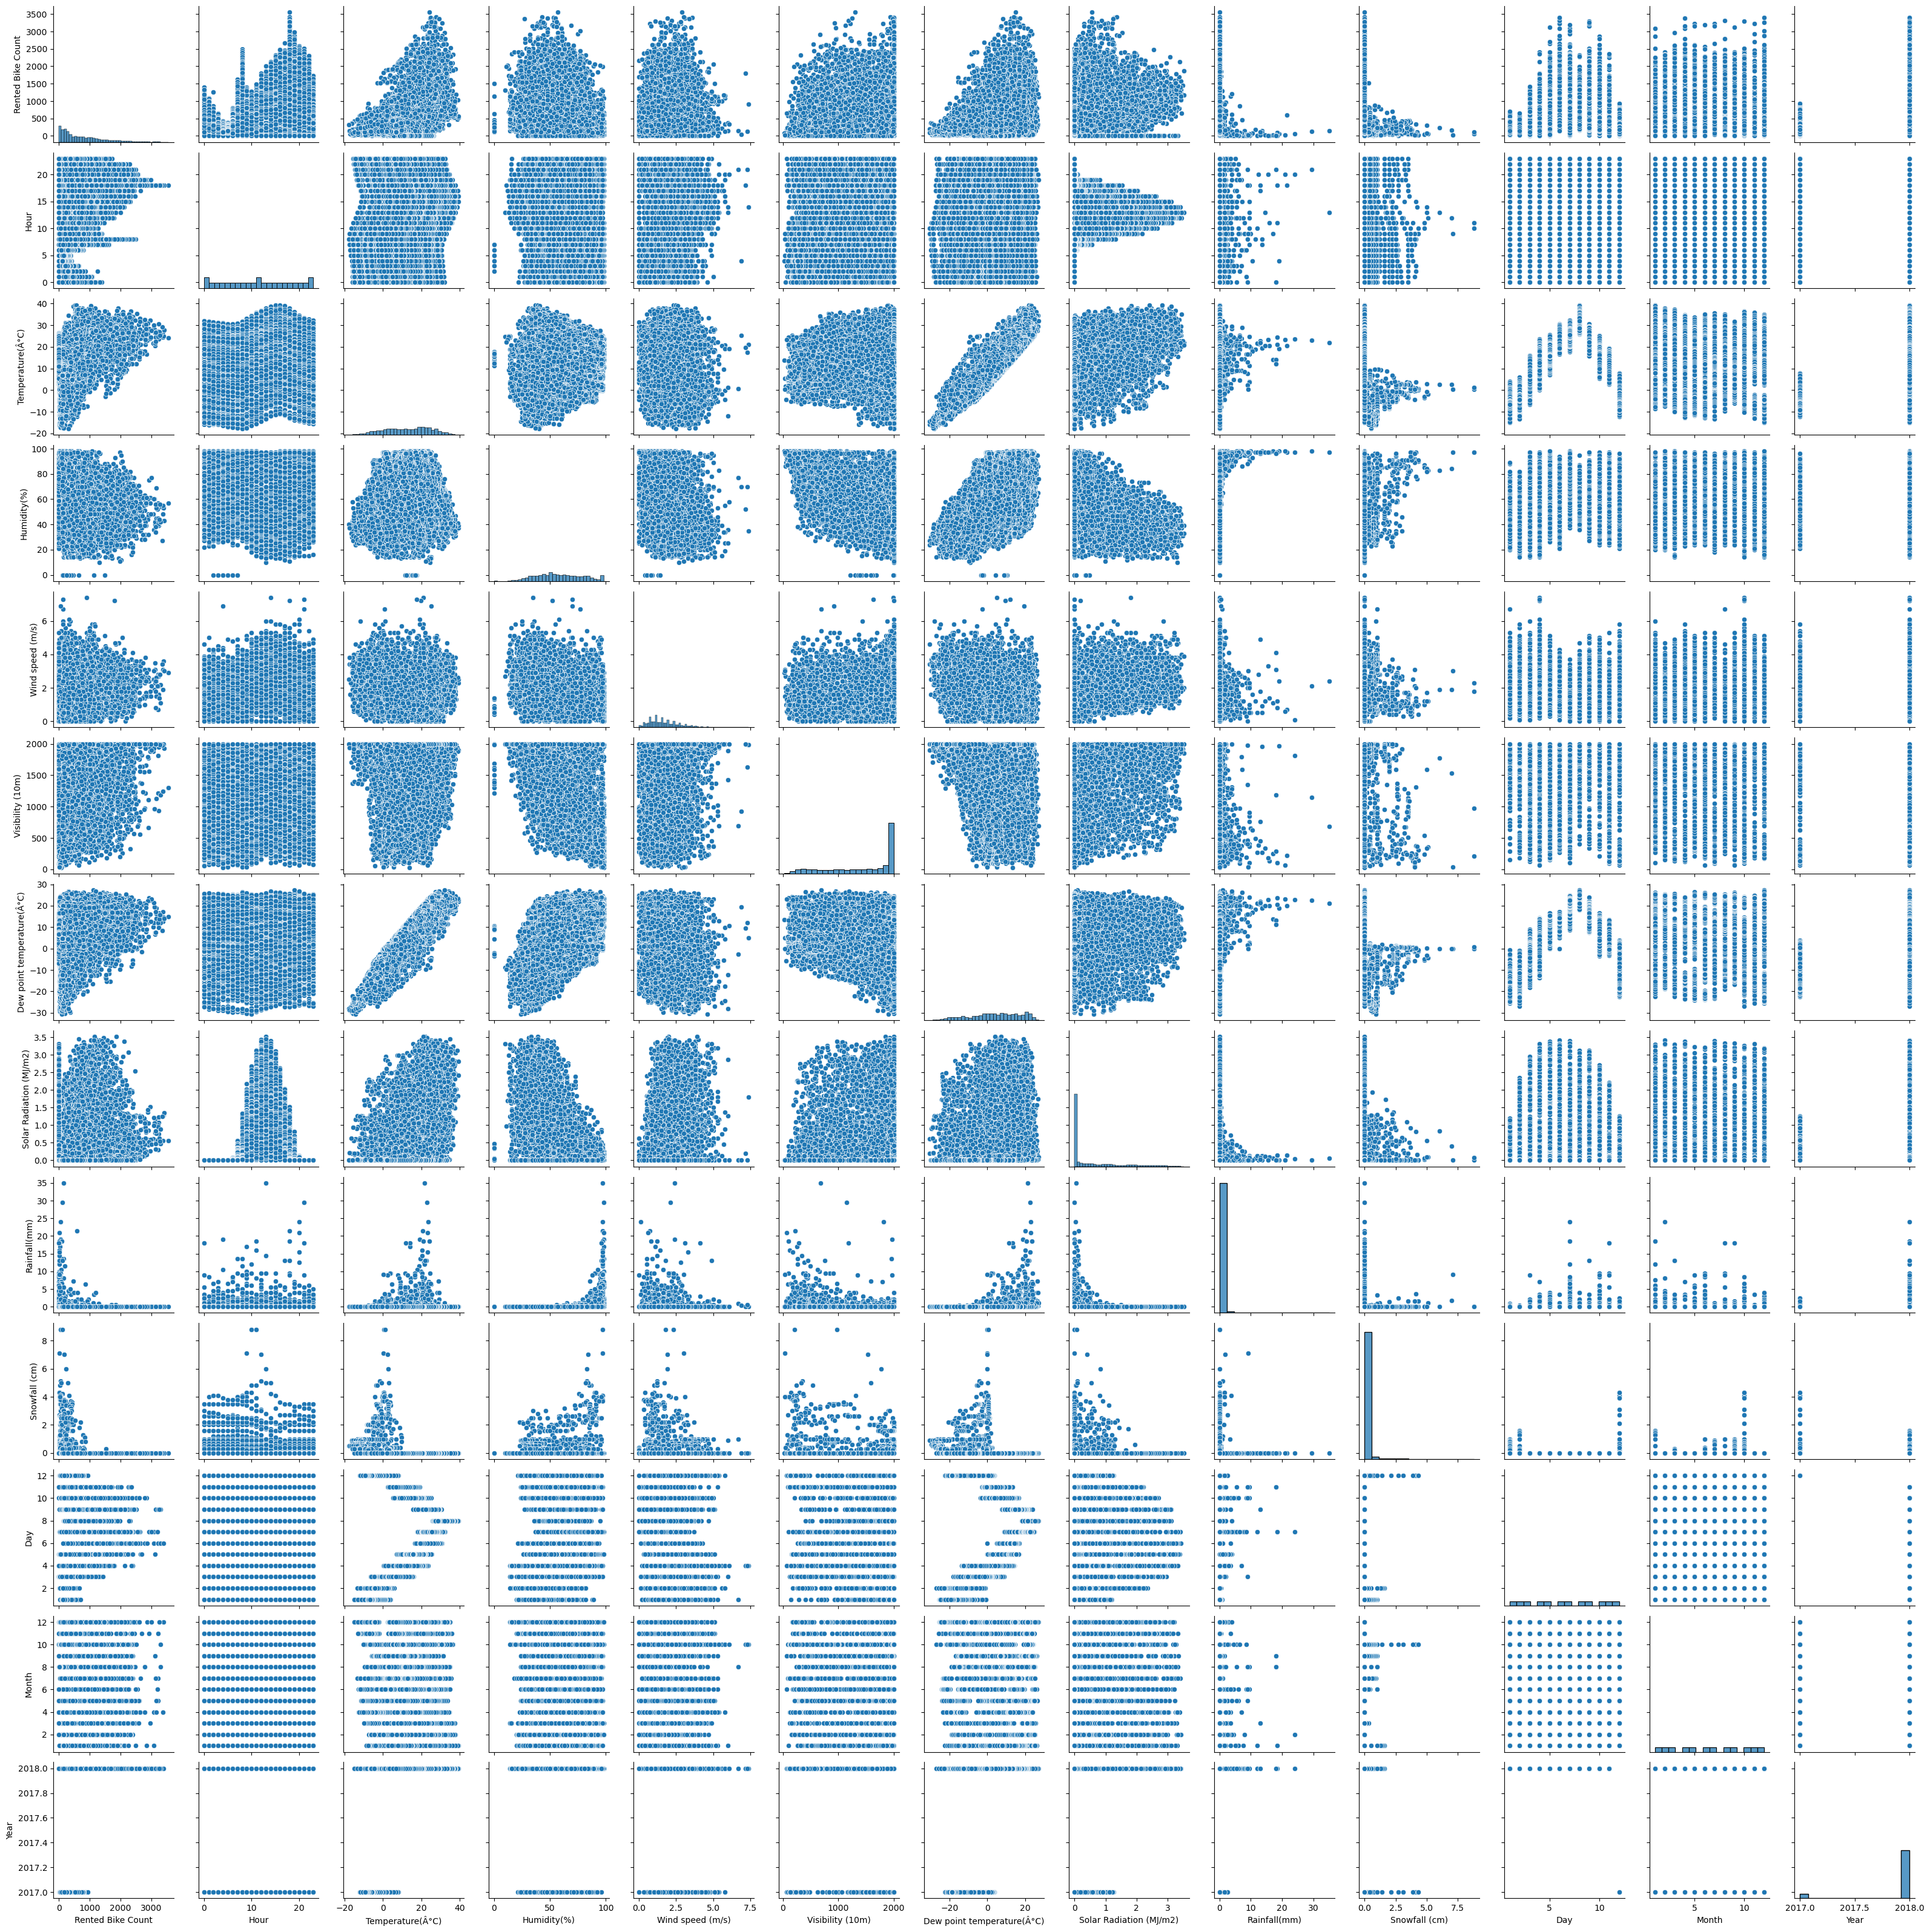

In [23]:
sns.pairplot(df)


<Axes: xlabel='Month', ylabel='Rented Bike Count'>

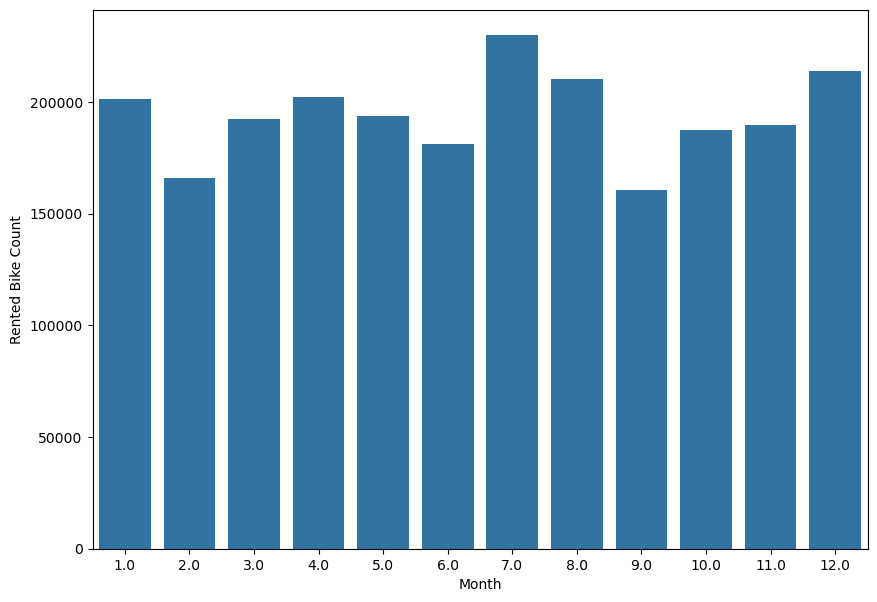

In [24]:
plt.figure(figsize=(10,7))
Month=df.groupby("Month").sum().reset_index()
sns.barplot(x="Month",y="Rented Bike Count",data=Month)


<Axes: xlabel='Day', ylabel='Rented Bike Count'>

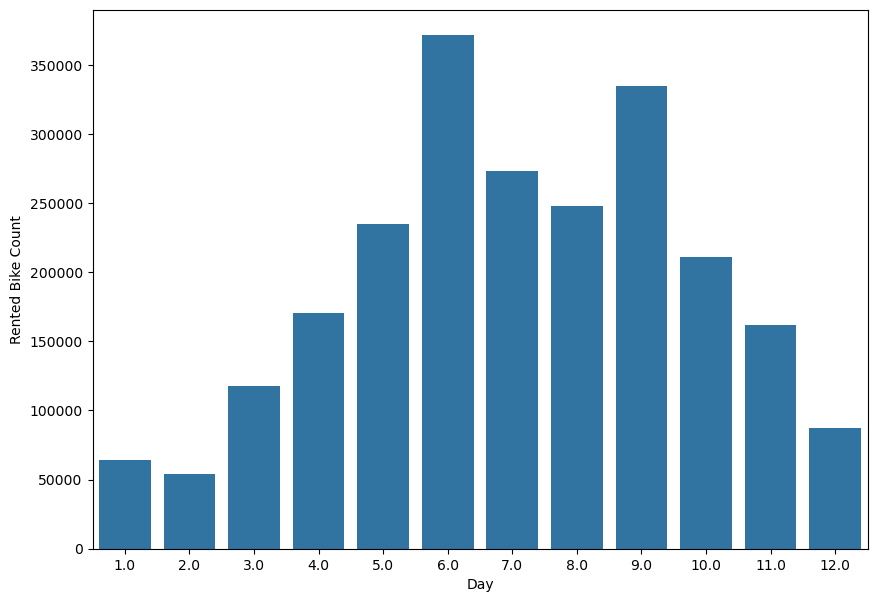

In [25]:
plt.figure(figsize=(10,7))
Day = df.groupby("Day").sum().reset_index()
sns.barplot(x="Day",y="Rented Bike Count",data=Day)

<Axes: xlabel='Hour', ylabel='Rented Bike Count'>

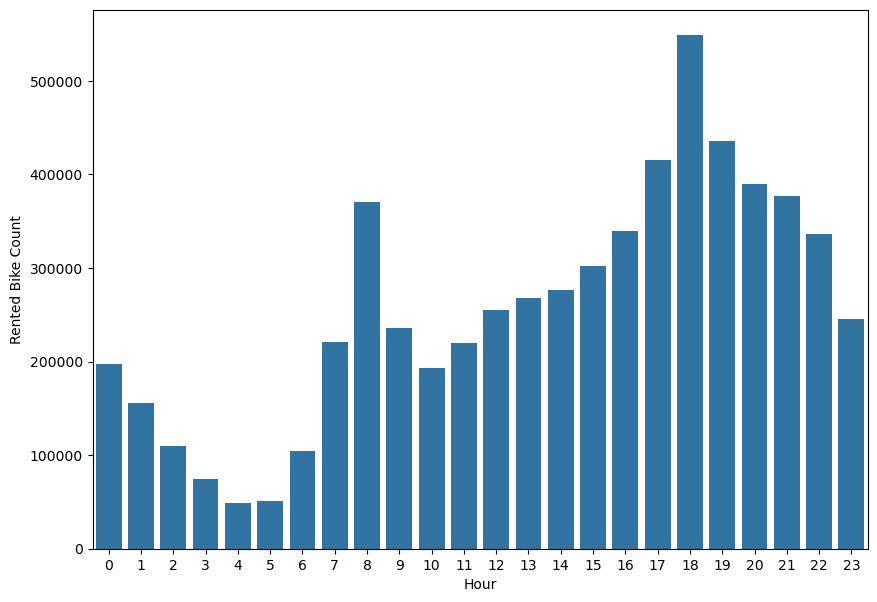

In [26]:
plt.figure(figsize=(10,7))
Hour = df.groupby("Hour").sum().reset_index()
sns.barplot(x="Hour",y="Rented Bike Count",data=Hour)

<Axes: xlabel='Holiday', ylabel='Rented Bike Count'>

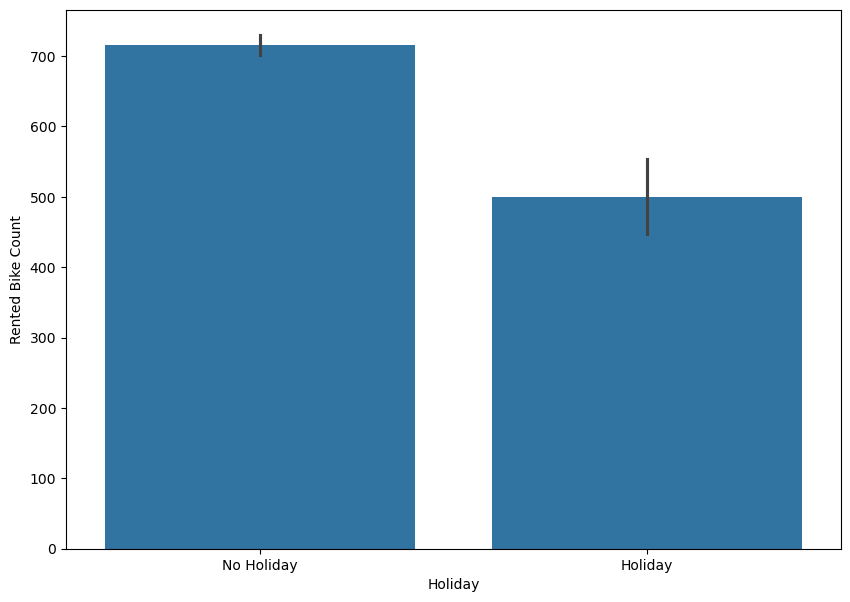

In [27]:
plt.figure(figsize=(10,7))
sns.barplot(x="Holiday",y="Rented Bike Count",data=df)

<Axes: xlabel='Seasons', ylabel='Rented Bike Count'>

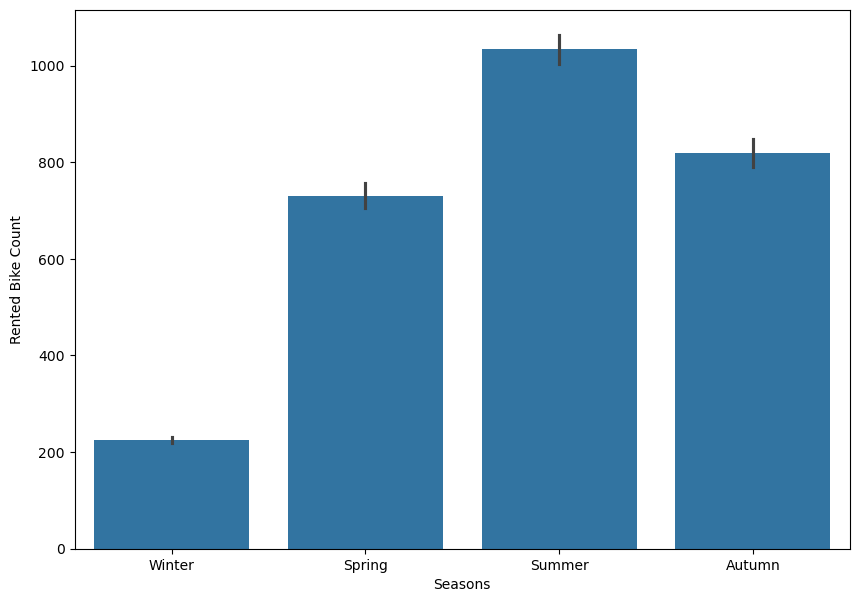

In [28]:
plt.figure(figsize=(10,7))
sns.barplot(x="Seasons",y="Rented Bike Count",data=df)

<Axes: xlabel='Rainfall(mm)', ylabel='Rented Bike Count'>

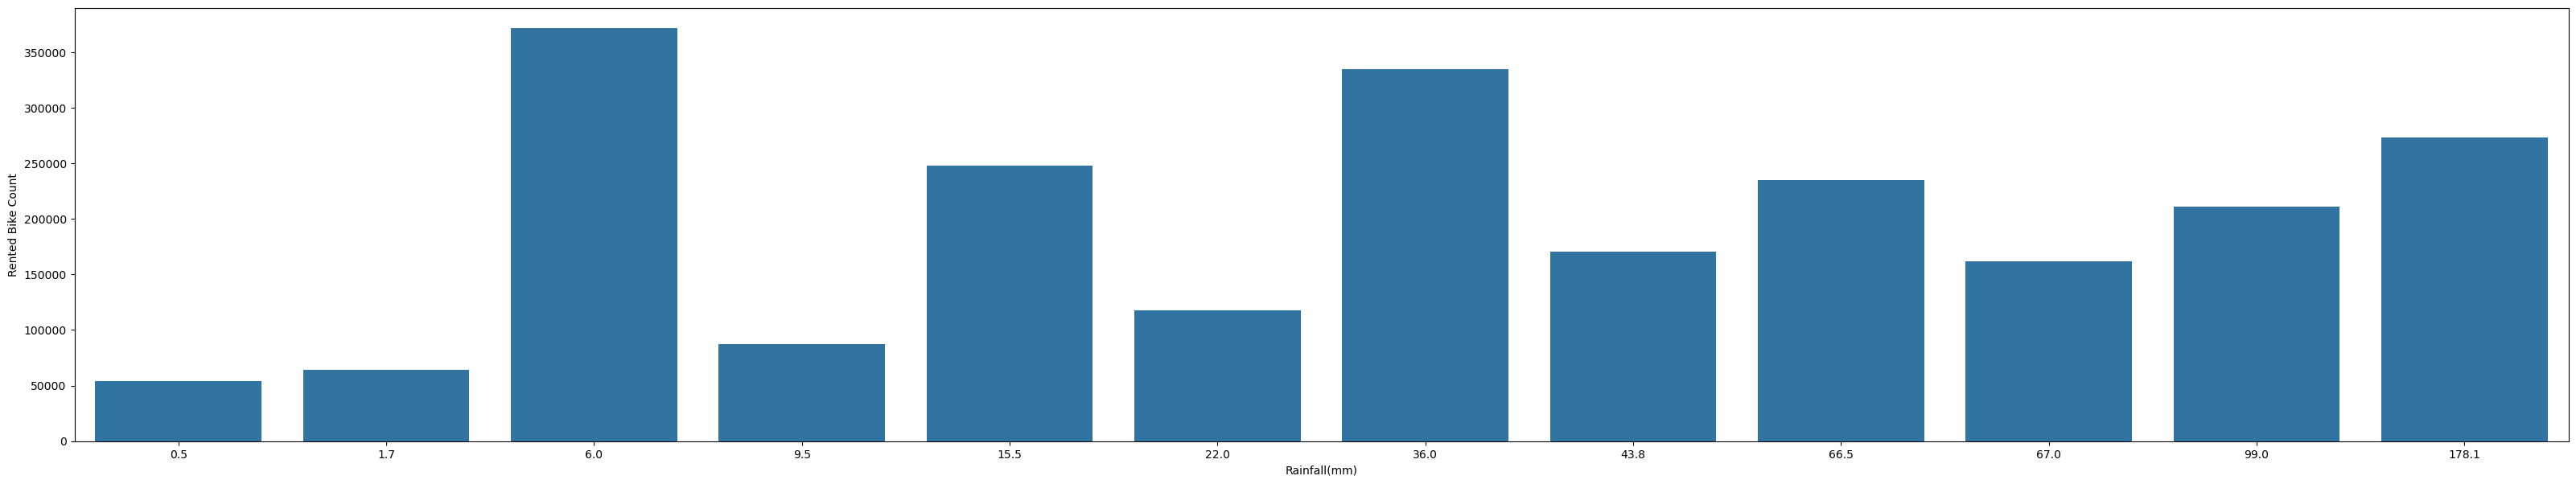

In [29]:
plt.figure(figsize=(40,7))
sns.barplot(x="Rainfall(mm)",y="Rented Bike Count",data=Day)

<Axes: xlabel='Snowfall (cm)', ylabel='Rented Bike Count'>

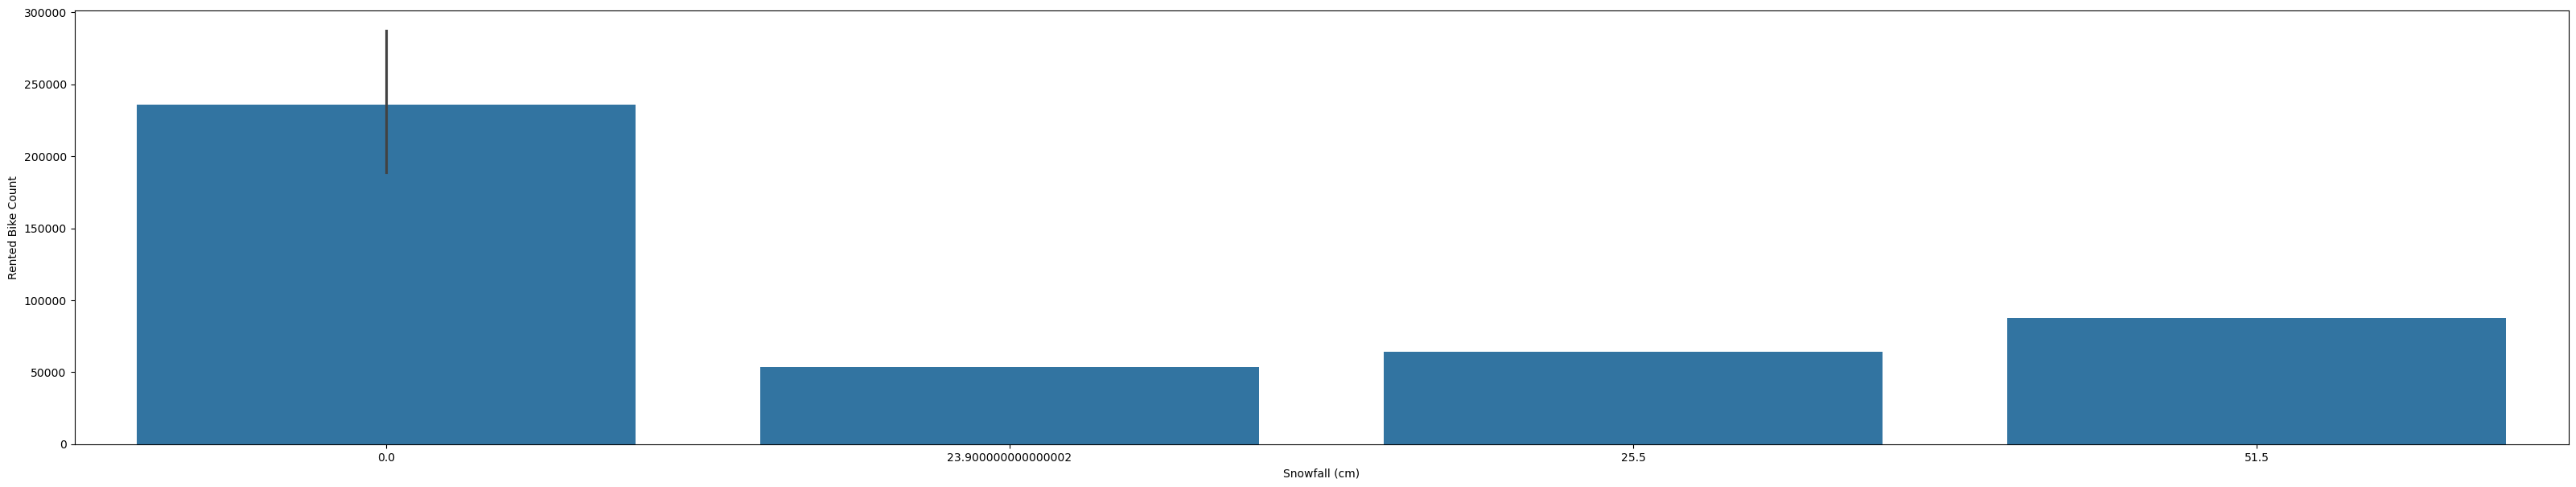

In [30]:
plt.figure(figsize=(40,7))
sns.barplot(x="Snowfall (cm)",y="Rented Bike Count",data=Day)

<Figure size 4000x700 with 0 Axes>

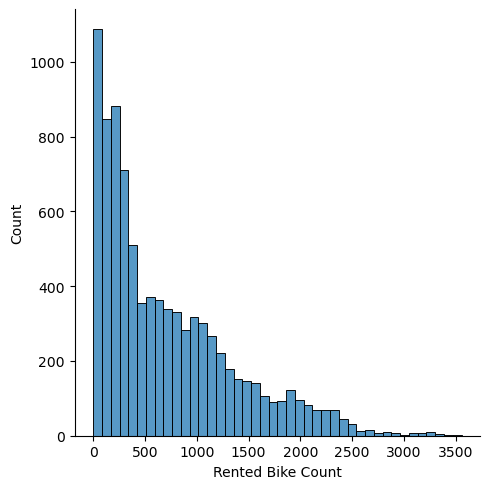

In [31]:
plt.figure(figsize=(40,7))
sns.displot(df["Rented Bike Count"])

In [32]:
sns.displot(np.sqrt(df["Rented Bike Count"]))

NameError: name 'np' is not defined

## Skewed Data



In [ ]:
# Assuming df is your DataFrame
numeric_df = df.select_dtypes(include=['float64', 'int64'])
skew_values = numeric_df.skew().sort_values(ascending=True)
print(skew_values
     #right mai lambi right skewed data and same left skewed


In [ ]:
#outlay remove
#collinearity -rented bike badh raha toh x feature badh raha ki ghat raha 
#multicollinearity-hamare multiple independent feature dependent feature ke sath kaise depend kara relate krta hai 




## Remove Multicollinearity

In [ ]:


# Assuming df is your DataFrame
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()


In [ ]:
drop = "Dew point temperature"

In [ ]:
def get_vif(df):
    vif=pd.DataFrame()
    vif["variables"]=df.columns()
    vif["VIF"]=[variance_inflation_factor(df.values,i) for i in range(df.shape[1])]

    return vif
       

In [ ]:


def get_vif(df):
    # Ensure df is a DataFrame and not a list
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif

# Assuming df is your DataFrame
not_for_vif = ["Day", "Month", "Year", "Dew point temperature(Â°C)", "Rented Bike Count"]
selected_columns = [i for i in df.describe().columns if i not in not_for_vif]
selected_df = df[selected_columns]

# Call the function with the selected DataFrame
vif_data = get_vif(add_constant(selected_df))
print(vif_data)


In [ ]:
not_for_vif = ["Day", "Month", "Year","Rented Bike count","Dew point temperature(Â°C)"]
get_vif(df[[i for i in df.describe().columns if i not in not_for_vif]])

In [ ]:
print(df.columns)


In [ ]:
df.drop(["Dew point temperature (Â°C)"], axis=1, inplace=True)


## ENCODING